# Titulo: Análisis de factores económicos, sociales y demográficos que influyen en el desempeño de estudiantes de La Guajira en las pruebas SABER-PRO

- **Fuente de datos**: [Datos resultados saber pro 2018-2022](https://www.datos.gov.co/Educaci-n/Resultados-nicos-Saber-Pro/u37r-hjmu/about_data)
- **Intro**:  La Prueba Saber Pro es un examen estandarizado aplicado en Colombia que tiene como objetivo evaluar las competencias y conocimientos de los estudiantes que están por graduarse de programas de educación superior. Este examen es organizado por el Instituto Colombiano para la Evaluación de la Educación (ICFES) y mide diversas competencias en áreas como razonamiento crítico, lectura crítica, matemáticas, ciencias naturales y sociales, así como competencias específicas relacionadas con el programa académico del estudiante. Esto permite evaluar el nivel de formación que los estudiantes han alcanzado al finalizar su carrera. Los resultados de la Prueba Saber Pro son utilizados por las instituciones de educación superior para mejorar la calidad de sus programas académicos. A través de estos resultados, las universidades pueden identificar áreas de fortaleza y debilidad en el desempeño de sus estudiantes, lo que les permite realizar ajustes curriculares y fortalecer las áreas donde los estudiantes presentan mayores dificultades. Así, la prueba no solo evalúa a los estudiantes, sino que también se convierte en una herramienta de retroalimentación para las instituciones.

- **Objetivo principal**: El objetivo de esta minería de datos educativos es analizar la relación entre las variables cuantitativas, demográficas, académicas y socioeconómicas de los estudiantes de La Guajira, para identificar patrones y tendencias que influyan en su rendimiento académico, específicamente en las pruebas SABER-PRO.

# 0. Librerias

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
path= os.getcwd()
print(os.listdir())
file_name=[x for x in os.listdir() if 'Saber_' in x][0]
file_name

['.git', 'actividadesbootcampds', 'Entrega_actividad_1.ipynb', 'Entrega_actividad_2.ipynb', 'Entrega_actividad_3.ipynb', 'Resultados_Saber_Pro.csv']


'Resultados_Saber_Pro.csv'

# 1. Data Extraction

In [4]:
full_path = os.path.join(path,file_name)
print(full_path)
#df=pd.read_csv(path+ '\\' +file_name,sep=",",encoding='utf-8')
df=pd.read_csv(full_path,sep=",",encoding='utf-8', low_memory=True)
df

c:\Users\andre\Documents\Bootcamp\Resultados_Saber_Pro.csv


,PERIODO,ESTU_CONSECUTIVO,ESTU_TIPODOCUMENTO,ESTU_PAIS_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,...,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,INST_ORIGEN,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT
0,20183,EK201830011083,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,NaN,NaN,...,Si,Secundaria (Bachillerato) incompleta,NO OFICIAL - CORPORACIÓN,161,174.0,3.0,A2,139,161.0,128
1,20183,EK201830053875,CC,COLOMBIA,76.0,VALLE,76736.0,SEVILLA,NaN,NaN,...,Si,Secundaria (Bachillerato) incompleta,OFICIAL DEPARTAMENTAL,147,170.0,3.0,B1,171,188.0,182
2,20183,EK201830167993,CC,COLOMBIA,73.0,TOLIMA,73001.0,IBAGUÉ,1.730010e+11,73001.0,...,Si,No sabe,NO OFICIAL - CORPORACIÓN,142,77.0,1.0,A1,124,130.0,153
3,20183,EK201830168158,CC,COLOMBIA,68.0,SANTANDER,68081.0,BARRANCABERMEJA,1.680810e+11,68081.0,...,Si,Técnica o tecnológica completa,OFICIAL DEPARTAMENTAL,185,157.0,3.0,-A1,178,106.0,169
4,20183,EK201830164354,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,1.110010e+11,11001.0,...,Si,Educación profesional completa,OFICIAL DEPARTAMENTAL,114,132.0,2.0,A1,139,135.0,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217477,20222,EK202220148630,CC,COLOMBIA,41.0,HUILA,41396.0,LA PLATA,2.413960e+11,41396.0,...,Si,Primaria incompleta,OFICIAL NACIONAL,101,149.0,2.0,A2,153,134.0,140
1217478,20222,EK202220164335,CC,COLOMBIA,54.0,NORTE SANTANDER,54810.0,TIBÚ,1.548100e+11,54810.0,...,No,Primaria completa,NO OFICIAL - FUNDACIÓN,91,135.0,2.0,A2,100,132.0,93
1217479,20222,EK202220142587,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,3.230010e+11,23001.0,...,Si,Secundaria (Bachillerato) completa,NO OFICIAL - FUNDACIÓN,159,162.0,3.0,B1,190,178.0,163
1217480,20222,EK202220116355,CC,COLOMBIA,5.0,ANTIOQUIA,5001.0,MEDELLÍN,1.050010e+11,5001.0,...,Si,Secundaria (Bachillerato) incompleta,OFICIAL NACIONAL,179,156.0,3.0,A2,137,134.0,154


In [5]:
nombres_columnas = df.columns.tolist()
print(nombres_columnas)

['PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_TIPODOCUMENTO', 'ESTU_PAIS_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_MCPIO_RESIDE', 'ESTU_CODDANE_COLE_TERMINO', 'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_COD_DEPTO_PRESENTACION', 'INST_COD_INSTITUCION', 'INST_NOMBRE_INSTITUCION', 'INST_CARACTER_ACADEMICO', 'ESTU_NUCLEO_PREGRADO', 'ESTU_INST_DEPARTAMENTO', 'ESTU_INST_CODMUNICIPIO', 'ESTU_INST_MUNICIPIO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_MUNICIPIO', 'ESTU_NIVEL_PRGM_ACADEMICO', 'ESTU_METODO_PRGM', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_DEPTO_PRESENTACION', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION', 'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO', 'ESTU_HORASSEMANATRABAJA', 'ESTU_SNIES_PRGMACADEMICO', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_NACIONALIDAD', 'ESTU_ESTUDIANTE', 'ESTU_GENERO', 'ESTU_COLE_TERMINO', 'ESTU_PAGOMATRICULAPADRES', 'ESTU_ESTADOINVESTIGACION', 'ESTU_FECHANACIMIENTO', 'ESTU_PAG

**Columnas de interes**: 
De las 57 columnas del dataset, se han seleccionado 29 variables. A continuaciónn está el desglose de cada tipo de variables:

1. Variables Cuantitativas- Resultados pruebas (7):
MOD_RAZONA_CUANTITAT_PUNT, MOD_COMUNI_ESCRITA_PUNT, MOD_COMUNI_ESCRITA_DESEM, MOD_INGLES_DESEM, MOD_LECTURA_CRITICA_PUNT, MOD_INGLES_PUNT, MOD_COMPETEN_CIUDADA_PUNT

2. Datos Demográficos (5):
ESTU_PAIS_RESIDE, ESTU_DEPTO_RESIDE, ESTU_MCPIO_RESIDE, ESTU_NACIONALIDAD, ESTU_GENERO

3. Información Académica (6):
INST_CARACTER_ACADEMICO, ESTU_NUCLEO_PREGRADO, ESTU_INST_DEPARTAMENTO, ESTU_PRGM_ACADEMICO, ESTU_NIVEL_PRGM_ACADEMICO, ESTU_METODO_PRGM, PERIODO

4. Aspectos Económicos y Sociales (10):
ESTU_VALORMATRICULAUNIVERSIDAD, ESTU_PAGOMATRICULABECA, ESTU_PAGOMATRICULACREDITO, FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE, FAMI_TIENEAUTOMOVIL, FAMI_TIENELAVADORA, FAMI_ESTRATOVIVIENDA, FAMI_TIENECOMPUTADOR, FAMI_TIENEINTERNET

5. Trabajo y Gestión del Tiempo (1):
ESTU_HORASSEMANATRABAJA

Razones de la selección:

1. Variables Cuantitativas:

Las variables cuantitativas proporcionan datos medibles que permiten una evaluación precisa del rendimiento y habilidades del estudiante. Por ejemplo, MOD_RAZONA_CUANTITAT_PUNT mide las habilidades en razonamiento cuantitativo, lo cual es crucial para evaluar la capacidad del estudiante en resolución de problemas numéricos y análisis matemático. MOD_COMUNI_ESCRITA_PUNT evalúa la competencia en comunicación escrita, una habilidad indispensable para el éxito académico y profesional. MOD_INGLES_PUNT refleja el dominio del inglés, que es importante para el acceso a recursos globales y la adaptación en contextos internacionales. Finalmente, MOD_COMPETEN_CIUDADA_PUNT proporciona una medida de las habilidades en competencias ciudadanas, esenciales para una participación activa y efectiva en la sociedad.

2. Datos Demográficos:

Las variables demográficas ofrecen un contexto valioso sobre el entorno del estudiante y sus características personales. ESTU_TIPODOCUMENTO proporciona información sobre el tipo de documento de identidad del estudiante, relevante para cuestiones administrativas y legales. ESTU_PAIS_RESIDE muestra el país de residencia, lo que ayuda a entender el contexto cultural, social y económico que puede influir en el rendimiento académico. ESTU_DEPTO_RESIDE y ESTU_MCPIO_RESIDE ofrecen detalles adicionales sobre la región y municipio de residencia, lo que permite analizar cómo los factores locales pueden impactar el acceso a recursos y oportunidades educativas. ESTU_NACIONALIDAD brinda información sobre la nacionalidad del estudiante, lo que puede afectar su experiencia educativa. Por último, ESTU_GENERO es esencial para analizar la equidad de género en el acceso a la educación y el rendimiento académico.

3. Información Académica:

Las variables académicas son fundamentales para comprender las trayectorias educativas y el contexto académico del estudiante. INST_CARACTER_ACADEMICO indica el tipo de institución educativa (pública, privada, etc.), lo que permite comparar recursos y oportunidades entre diferentes instituciones. ESTU_NUCLEO_PREGRADO identifica el núcleo o programa de pregrado del estudiante, facilitando el análisis de las áreas de estudio. ESTU_INST_DEPARTAMENTO proporciona información sobre el departamento de la institución, lo que ayuda a evaluar los recursos y la calidad educativa. ESTU_PRGM_ACADEMICO especifica el programa académico del estudiante, útil para analizar las tendencias en el desempeño y la relación entre áreas de estudio. ESTU_NIVEL_PRGM_ACADEMICO categoriza el nivel del programa, permitiendo una comprensión más clara de las trayectorias educativas y sus efectos. Finalmente, ESTU_METODO_PRGM describe el método de enseñanza del programa, lo cual puede influir en el aprendizaje y el desempeño del estudiante.

4. Aspectos Económicos y Sociales:

Las variables económicas y sociales son cruciales para entender el impacto del entorno socioeconómico en el rendimiento académico. ESTU_VALORMATRICULAUNIVERSIDAD mide el costo de la matrícula universitaria, un factor importante que puede influir en la decisión de continuar los estudios y el rendimiento. ESTU_PAGOMATRICULABECA y ESTU_PAGOMATRICULACREDITO indican cómo se financia la matrícula, lo que puede afectar la estabilidad económica y el rendimiento del estudiante. FAMI_EDUCACIONPADRE y FAMI_EDUCACIONMADRE reflejan el nivel educativo de los padres, lo cual puede influir en el apoyo académico y los recursos disponibles para el estudiante. Además, FAMI_TIENEAUTOMOVIL, FAMI_TIENELAVADORA, FAMI_ESTRATOVIVIENDA, FAMI_TIENECOMPUTADOR, y FAMI_TIENEINTERNET proporcionan información sobre las condiciones de vida y el acceso a recursos tecnológicos, lo cual es relevante para evaluar el contexto económico y social del estudiante.

5. Trabajo y Gestión del Tiempo:

La variable ESTU_HORASSEMANATRABAJA ofrece información sobre la cantidad de horas que el estudiante trabaja semanalmente. Esta información es clave para analizar cómo el trabajo a tiempo parcial o completo puede afectar el rendimiento académico y la capacidad del estudiante para gestionar sus responsabilidades. 



In [6]:
#!pip install -q seaborn matplotlib

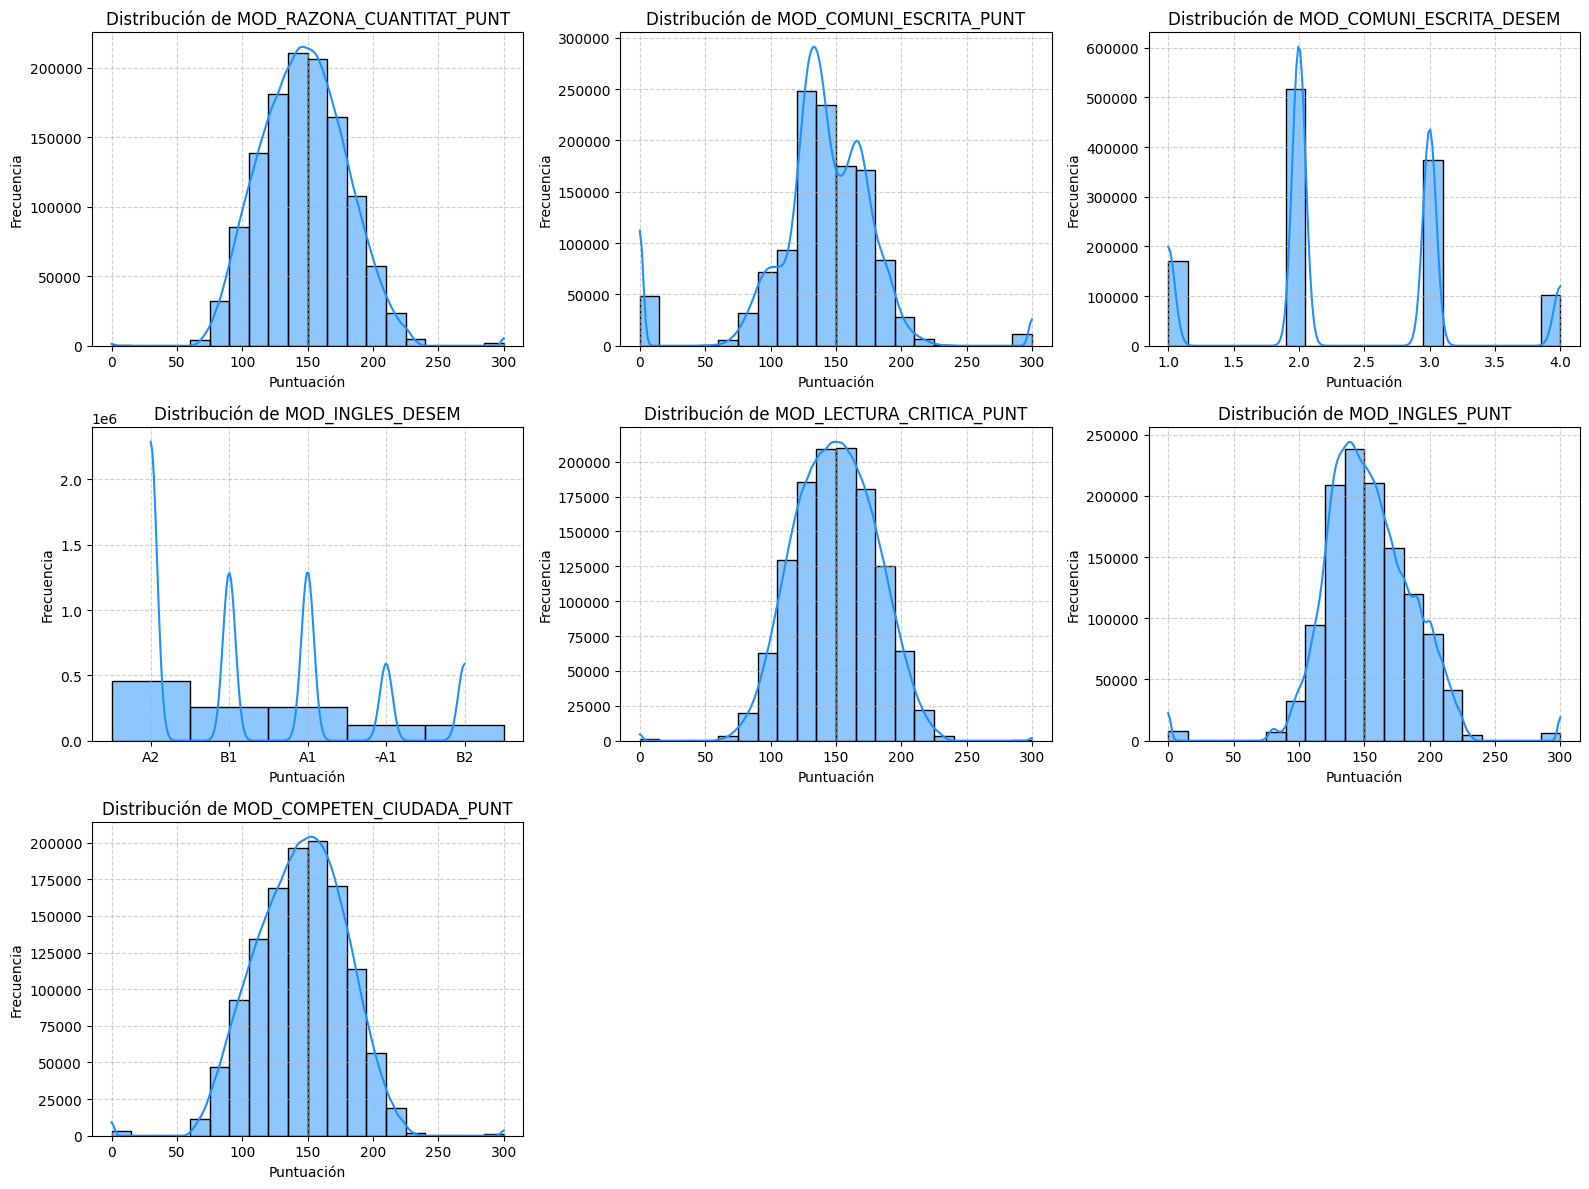

In [7]:
# Lista de variables cuantitativas
variables_cuantitativas = [
    'MOD_RAZONA_CUANTITAT_PUNT',
    'MOD_COMUNI_ESCRITA_PUNT',
    'MOD_COMUNI_ESCRITA_DESEM',
    'MOD_INGLES_DESEM',
    'MOD_LECTURA_CRITICA_PUNT',
    'MOD_INGLES_PUNT',
    'MOD_COMPETEN_CIUDADA_PUNT'
]

plt.figure(figsize=(16, 12))

for i, variable in enumerate(variables_cuantitativas):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[variable], bins=20, kde=True, color='dodgerblue')
    plt.title(f'Distribución de {variable}', fontsize=12)
    plt.xlabel('Puntuación', fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

La gráfica presenta los resultados de todas las competencias genéricas evaluadas en la prueba Saber Pro. Se observa que las distribuciones de 'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_INGLES_PUNT', y 'MOD_COMPETEN_CIUDADA_PUNT' siguen una distribución normal, con una mayor frecuencia alrededor de 150, que representa la media para estas pruebas. En general, hay pocos estudiantes que se acercan a la puntuación máxima en cada una de estas competencias.

En cuanto al desempeño en 'MOD_COMUNI_ESCRITA_DESEM', la mayoría de los resultados se concentran en el nivel 2, con un desempeño que llega hasta 4. En 'MOD_INGLES_DESEM', el nivel más frecuente es A2, mientras que los niveles BA y A1 tienen una frecuencia similar.

In [8]:
conteos = df.groupby(['FAMI_ESTRATOVIVIENDA', 'ESTU_GENERO']).size().reset_index(name='count')

# Mostrar los conteos
print(conteos)

   FAMI_ESTRATOVIVIENDA ESTU_GENERO   count
0             Estrato 1           F  130180
1             Estrato 1           M   75679
2             Estrato 2           F  247535
3             Estrato 2           M  162243
4             Estrato 3           F  210549
5             Estrato 3           M  155473
6             Estrato 4           F   61937
7             Estrato 4           M   50630
8             Estrato 5           F   21880
9             Estrato 5           M   18790
10            Estrato 6           F   11488
11            Estrato 6           M   10220
12          Sin Estrato           F    3012
13          Sin Estrato           M    2661


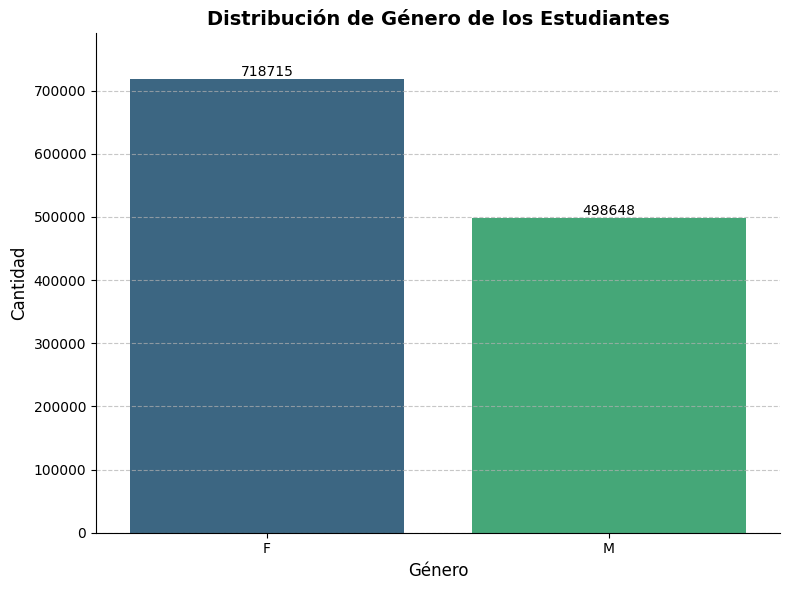

In [9]:
gender_counts = df['ESTU_GENERO'].value_counts().reset_index()
gender_counts.columns = ['Género', 'Cantidad']

plt.figure(figsize=(8, 6))
sns.barplot(data=gender_counts, x='Género', y='Cantidad', palette='viridis')
plt.title('Distribución de Género de los Estudiantes', fontsize=14, weight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
for index, row in gender_counts.iterrows():
    plt.text(row.name, row['Cantidad'] + 0.5, f'{row["Cantidad"]}', ha='center', va='bottom', fontsize=10, color='black')
# Estetica
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, gender_counts['Cantidad'].max() * 1.1)  # Espacio en barra
sns.despine()
plt.tight_layout()
plt.show()


El gráfico muestra que el género femenino (F) tiene una representación significativamente mayor en el conjunto de datos, que representa más de 700.000 en todo el dataset,  en comparación con el género masculino (M), que se acerca a 500.000. Esta diferencia en las cantidades es evidente en el gráfico, donde las barras correspondientes al género femenino son notablemente más altas, reflejando la mayoría de estudiantes mujeres en el conjunto de datos.





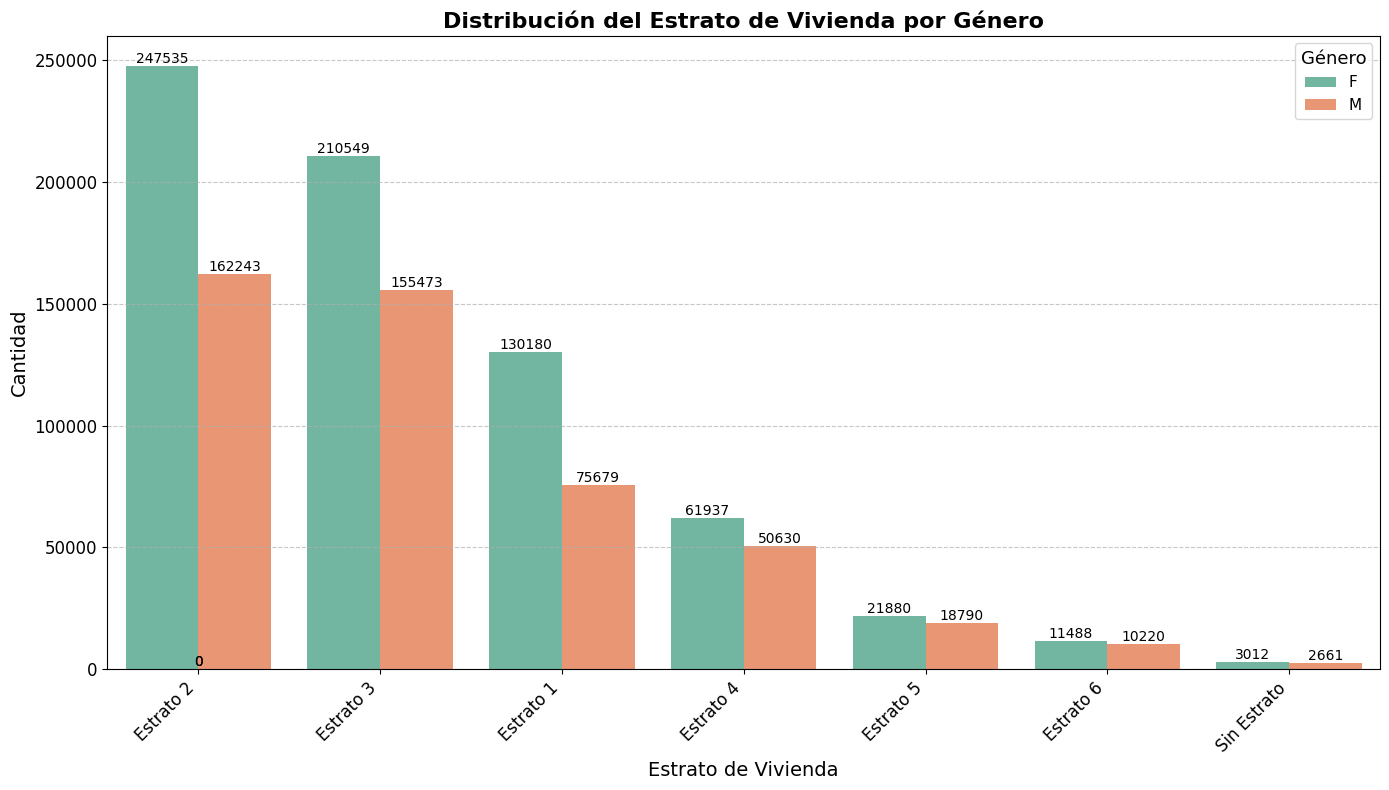

In [10]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='FAMI_ESTRATOVIVIENDA', hue='ESTU_GENERO', palette='Set2')

plt.title('Distribución del Estrato de Vivienda por Género', fontsize=16, weight='bold')
plt.xlabel('Estrato de Vivienda', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Rotar ticks
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Agrgear labels
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2,
             p.get_height() + 0.5,
             f'{int(p.get_height())}',
             ha='center', va='bottom', fontsize=10, color='black')

# Leyenda
plt.legend(title='Género', title_fontsize='13', fontsize='11', loc='upper right')

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Layout
plt.tight_layout()

plt.show()

1. La cantidad de mujeres (F) es significativamente mayor que la de hombres (M) en todos los estratos de vivienda. El Estrato 2, hay 247,535 mujeres frente a 162,243 hombres.

2. La diferencia entre géneros es más notable en los estratos con mayor población, como el Estrato 2 y Estrato 3. La diferencia disminuye en estratos con menor población.

3. En los estratos más bajos (Estrato 1 y Estrato 2), tanto el número total de personas como la diferencia entre géneros es mayor.

4. En los estratos más altos (Estrato 5 y Estrato 6), el número total de personas es menor, y la diferencia entre géneros también es menos pronunciada.

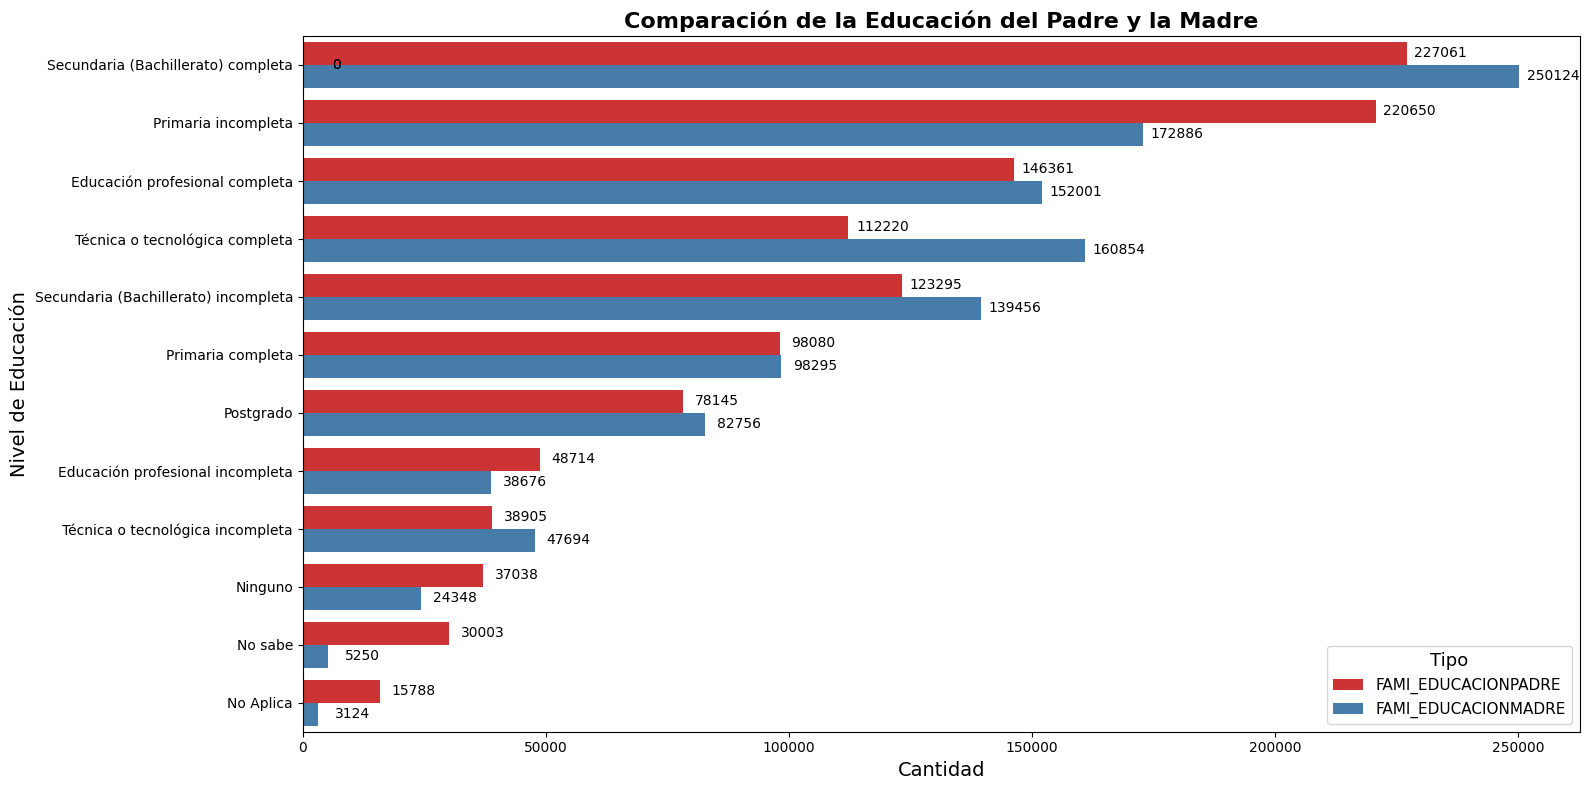

In [11]:
df_comparacion = pd.melt(df[['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']], 
                         value_vars=['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'], 
                         var_name='Tipo', 
                         value_name='Educacion')


plt.figure(figsize=(16, 8))
sns.countplot(data=df_comparacion, y='Educacion', hue='Tipo', palette='Set1', order=df_comparacion['Educacion'].value_counts().index)

# titulo y labels
plt.title('Comparación de la Educación del Padre y la Madre', fontsize=16, weight='bold')
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Nivel de Educación', fontsize=14)

# Labels
for p in plt.gca().patches:
    width = p.get_width()
    plt.text(width + 7000, p.get_y() + p.get_height() / 2, f'{int(width)}', 
             ha='center', va='center', fontsize=10, color='black')

# Leyenda
plt.legend(title='Tipo', title_fontsize='13', fontsize='11', loc='lower right')

# Ajustar el layout
plt.tight_layout()

plt.show()

1. La figura presenta el nivel de formación de los padres de los estudiantes que presentan la prueba Saber Pro. En cuanto al nivel educativo de los padres, se observa que, en su mayoría, los padres tienen la secundaria completa, con un total de 227,061 casos, lo que representa la mayor cantidad comparado con otras categorías. Esto sugiere que la secundaria completa es el nivel educativo más común entre los padres de estos estudiantes. En comparación, las madres también tienen una alta representación con secundaria completa, sumando 250,124 casos, lo que es superior al número de padres con el mismo nivel educativo.

2. Por otro lado, en el nivel de educación primaria incompleta, las madres tienen una mayor representación con 172,886 casos frente a los 220,650 casos de los padres. Esto indica que, aunque los padres también tienen una cantidad considerable en esta categoría, las madres son más numerosas en el grupo con primaria incompleta.

3. La figura mustra que 78,145 padres y 82,756 madres han completado estudios de posgrado, reflejando una alta especialización académica en ambos grupos. Sin embargo, las madres tienen una mayor representación en esta categoría, lo que podría sugerir una tendencia hacia una mayor formación avanzada entre las mujeres en comparación con los hombres. Este hallazgo resalta la importancia de los estudios de posgrado en el perfil educativo de los padres y su posible impacto en el apoyo educativo que proporcionan a sus hijos.

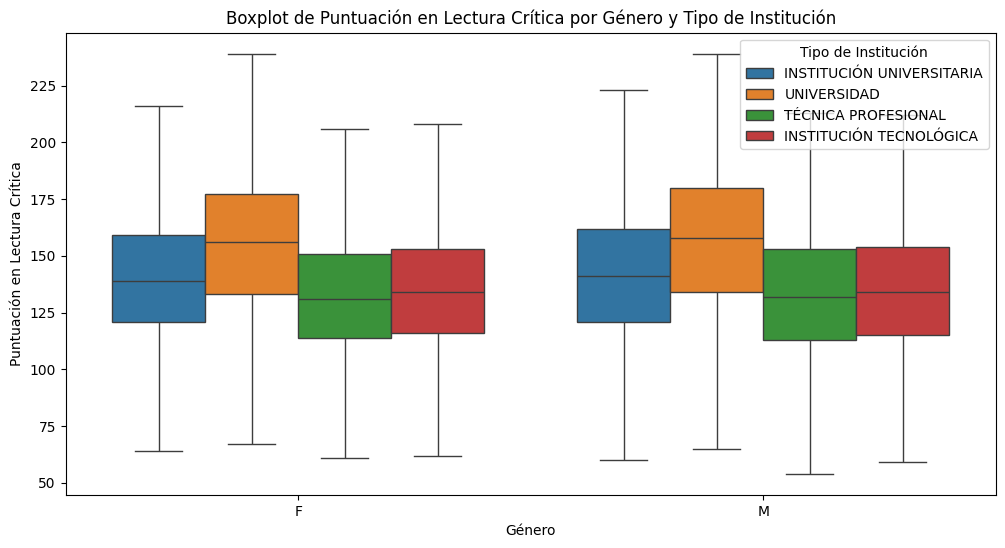

In [12]:
T = pd.DataFrame(df)

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=T, x='ESTU_GENERO', y='MOD_LECTURA_CRITICA_PUNT', hue='INST_CARACTER_ACADEMICO', showfliers=False)
plt.xlabel('Género')
plt.ylabel('Puntuación en Lectura Crítica')
plt.title('Boxplot de Puntuación en Lectura Crítica por Género y Tipo de Institución')
plt.legend(title='Tipo de Institución')
plt.show()

El boxplot revela que, en términos de puntuación en la competencia de lectura crítica, el género femenino obtiene mejores resultados en las instituciones de tipo universidad, alcanzando una media superior a 150 puntos. En contraste, en las instituciones técnicas profesionales, las mujeres presentan una media significativamente más baja. Para el género masculino, los resultados siguen una tendencia similar: en las universidades, la media de las puntuaciones es más alta, mientras que en las instituciones técnicas profesionales, la media es menor en comparación con las universidades y otros tipos de instituciones. Tanto para mujeres como para hombres, el tipo de institución influye en las puntuaciones de lectura crítica, siendo las universidades las que presentan las medias más altas.



In [13]:
conteo_departamentos = df['ESTU_DEPTO_RESIDE'].value_counts()

# Mostrar el conteo de cada departamento
print(conteo_departamentos)


ESTU_DEPTO_RESIDE
BOGOTÁ               326784
ANTIOQUIA            146234
VALLE                 95745
CUNDINAMARCA          76074
ATLANTICO             69830
SANTANDER             58419
BOLIVAR               39027
NORTE SANTANDER       36487
BOYACA                32657
TOLIMA                31600
NARIÑO                30594
CORDOBA               28960
HUILA                 26578
RISARALDA             24770
META                  24335
CAUCA                 23465
CALDAS                23130
CESAR                 21919
MAGDALENA             19519
SUCRE                 16017
QUINDIO               13738
LA GUAJIRA            12684
CHOCO                  8892
CASANARE               7786
CAQUETA                6881
PUTUMAYO               4926
ARAUCA                 3538
GUAVIARE                963
SAN ANDRES              922
EXTRANJERO              461
AMAZONAS                356
VICHADA                 351
VAUPES                  243
GUAINIA                 184
FRANKFURT                 2
MI

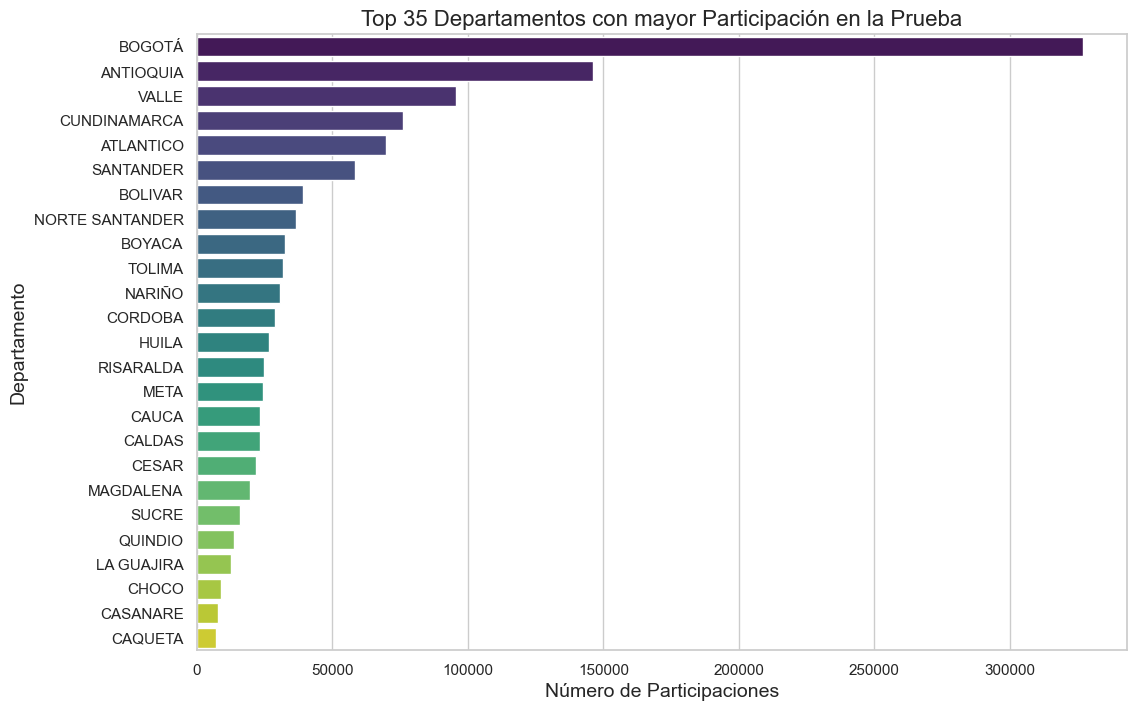

In [14]:
conteo_departamentos = df['ESTU_DEPTO_RESIDE'].value_counts()

# Obtener los 15 departamentos con más participación
top_25_departamentos = conteo_departamentos.head(25)

# Crear un DataFrame para facilitar la graficación
top_15_df = top_25_departamentos.reset_index()
top_15_df.columns = ['Departamento', 'Participaciones']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Participaciones', y='Departamento', data=top_15_df, palette='viridis')
plt.title('Top 35 Departamentos con mayor Participación en la Prueba', fontsize=16)
plt.xlabel('Número de Participaciones', fontsize=14)
plt.ylabel('Departamento', fontsize=14)
plt.show()

La gráfica muestra que la mayor concentración de universitarios que presentan la prueba se encuentra en la ciudad capital, Bogotá, con un total de 326,784 estudiantes. A continuación, los departamentos con mayores concentraciones incluyen Antioquia, con 146,234 estudiantes; Valle, con 95,745; Cundinamarca, con 76,074; Atlántico, con 69,830; Santander, con 58,419; y Bolívar, con 39,027, entre otros. En contraste, La Guajira ocupa el puesto 22 con 12,684 estudiantes, mostrando una representación considerablemente menor en comparación con las regiones mencionadas anteriormente.



**Actividad 3**

**Preguntas o hipótesis de interés sobre el dataset**

Preguntas
Pregunta: ¿Cuál es la correlación entre el puntaje en MOD_RAZONA_CUANTITAT_PUNT y el puntaje en MOD_LECTURA_CRITICA_PUNT para los estudiantes del departamento de La Guajira?

Hipótesis 1: Los estudiantes del departamento de La Guajira con puntajes más altos en MOD_RAZONA_CUANTITAT_PUNT también obtienen mejores puntajes en MOD_LECTURA_CRITICA_PUNT.

Pregunta: ¿Cuál es la relación entre MOD_COMPETEN_CIUDADA_PUNT y las variables de datos demográficos como ESTU_GENERO entre los estudiantes del departamento de La Guajira?

Hipótesis 2: Hay diferencias en MOD_COMPETEN_CIUDADA_PUNT según el género del estudiante en La Guajira, con ciertos géneros mostrando puntuaciones más altas.

Pregunta: ¿Existe una relación entre el nivel educativo de los padres (FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE) y el desempeño en MOD_LECTURA_CRITICA_PUNT para los estudiantes del departamento de La Guajira?

Hipótesis 3: Los estudiantes del departamento de La Guajira cuyos padres tienen un nivel educativo más alto (FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE) obtienen puntuaciones significativamente mejores en MOD_LECTURA_CRITICA_PUNT en comparación con los estudiantes cuyos padres tienen un nivel educativo más bajo.

Pregunta: ¿Cómo influyen las variables económicas y sociales, como el valor de la matrícula universitaria, el tipo de pago de matrícula (beca o crédito), la educación de los padres, y la disponibilidad de recursos en el hogar (automóvil, lavadora, estrato de vivienda, computador e internet), en los resultados de las pruebas académicas, incluyendo la puntuación en razonamiento cuantitativo, comunicación escrita, inglés, lectura crítica, y competencia ciudadana?

Hipótesis 4 : Los aspectos económicos y sociales, como el valor de la matrícula universitaria, el tipo de pago de la matrícula (beca o crédito), la educación de los padres, y la disponibilidad de recursos en el hogar (automóvil, lavadora, estrato de vivienda, computador e internet), tienen un impacto significativo en los resultados de las pruebas académicas.

Pregunta: ¿Cómo afecta la cantidad de horas trabajadas (ESTU_HORASSEMANATRABAJA) al rendimiento en pruebas de comunicación escrita (MOD_COMUNI_ESCRITA_PUNT) para los estudiantes de La Guajira?

Hipótesis 5: Hay una relación inversa entre el número de horas trabajadas semanalmente y el rendimiento en MOD_COMUNI_ESCRITA_PUNT para los estudiantes de La Guajira.

¿Por qué los puntajes de los estudiantes de La Guajira en las competencias de lectura crítica y razonamiento cuantitativo son menores en comparación con los puntajes de estudiantes de otros departamentos de Colombia?

Hipótesis 6: La gestión del tiempo de estudio (incluyendo la cantidad y calidad del tiempo dedicado al estudio) afecta de manera significativa los resultados en las competencias de lectura crítica y razonamiento cuantitativo, y esta influencia contribuye a la diferencia en los puntajes de los estudiantes de La Guajira en comparación con los de otros departamentos de Colombia.

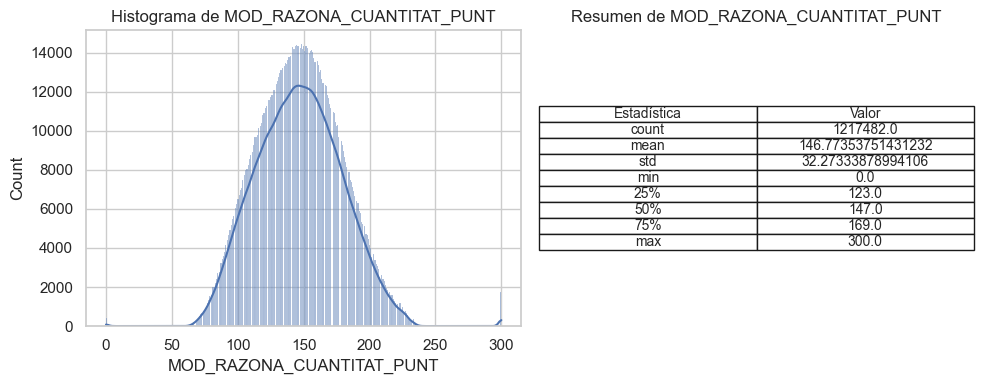

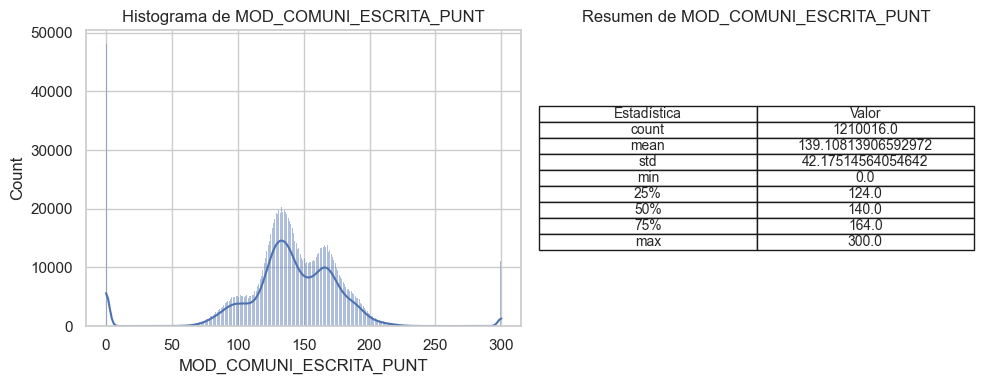

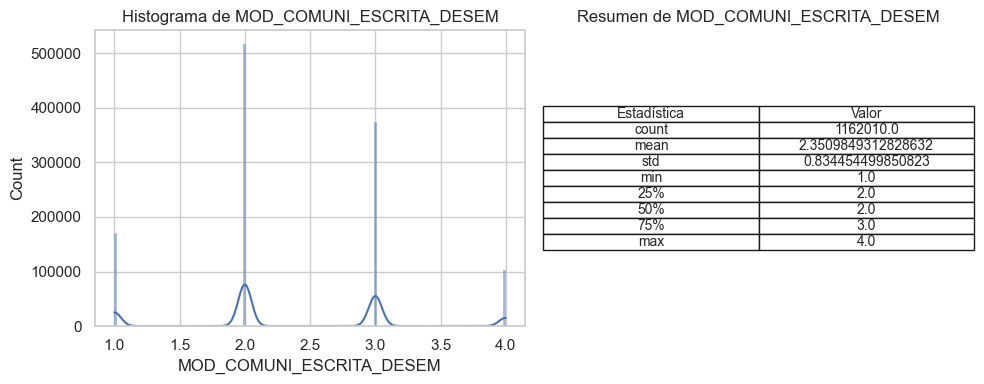

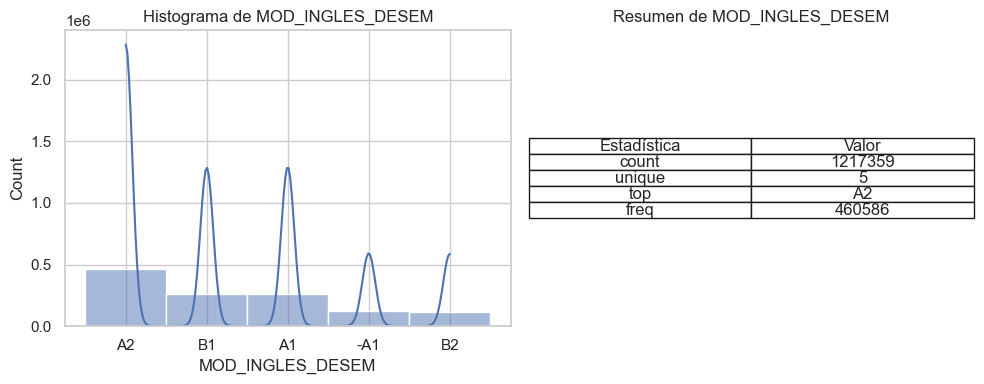

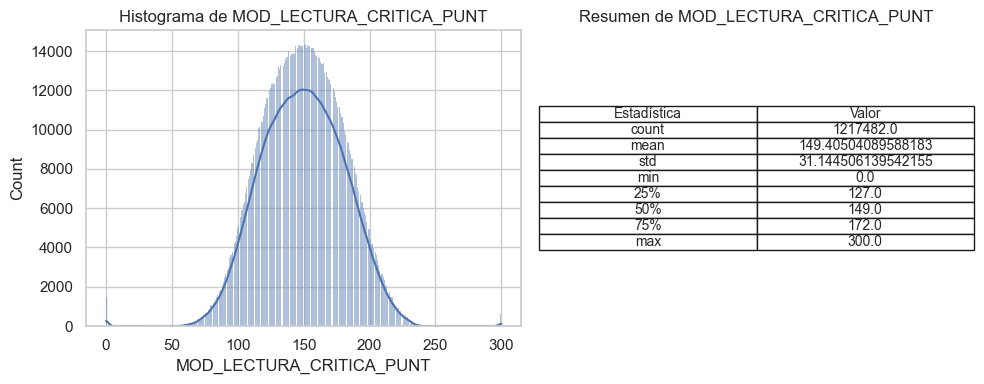

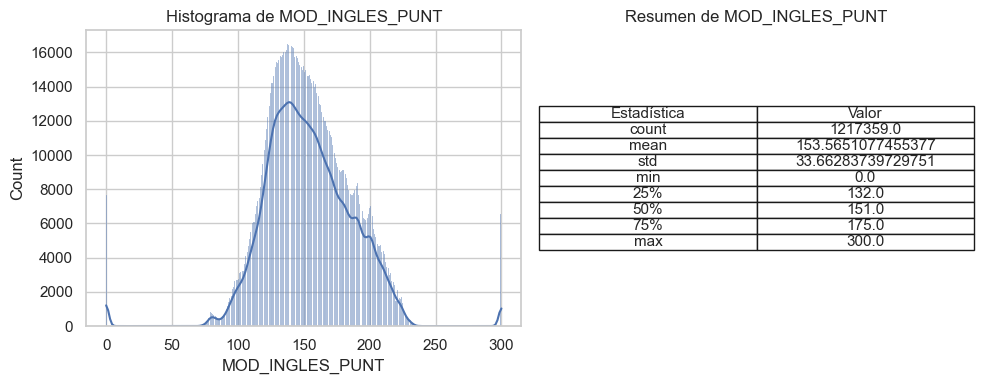

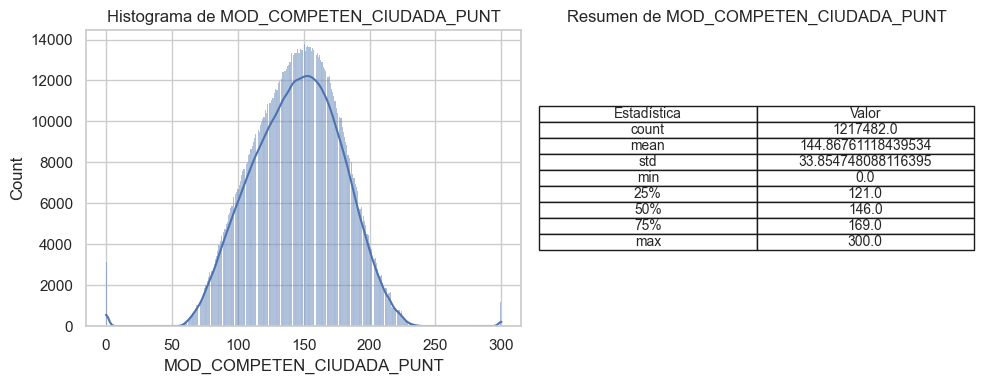

In [15]:
# Crear histogramas y resúmenes numéricos
for var in variables_cuantitativas:
    plt.figure(figsize=(10, 4))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histograma de {var}')

    # Resumen numérico
    plt.subplot(1, 2, 2)
    plt.table(cellText=df[var].describe().reset_index().values, 
              colLabels=['Estadística', 'Valor'], 
              cellLoc='center', 
              loc='center')
    plt.axis('off')
    plt.title(f'Resumen de {var}')
    
    plt.tight_layout()
    plt.show()

La gráfica presenta los resultados de todas las competencias genéricas evaluadas en la prueba Saber Pro. Se observa que las distribuciones de 'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_INGLES_PUNT', y 'MOD_COMPETEN_CIUDADA_PUNT' siguen una distribución normal, con una mayor frecuencia alrededor de 150, que representa la media para estas pruebas. 

En cuanto al desempeño en 'MOD_COMUNI_ESCRITA_DESEM', la mayoría de los resultados se concentran en el nivel 2, con un desempeño que llega hasta 4. En 'MOD_INGLES_DESEM', el nivel más frecuente es A2, mientras que los niveles BA y A1 tienen una frecuencia similar.

2. Visualización Bivariada


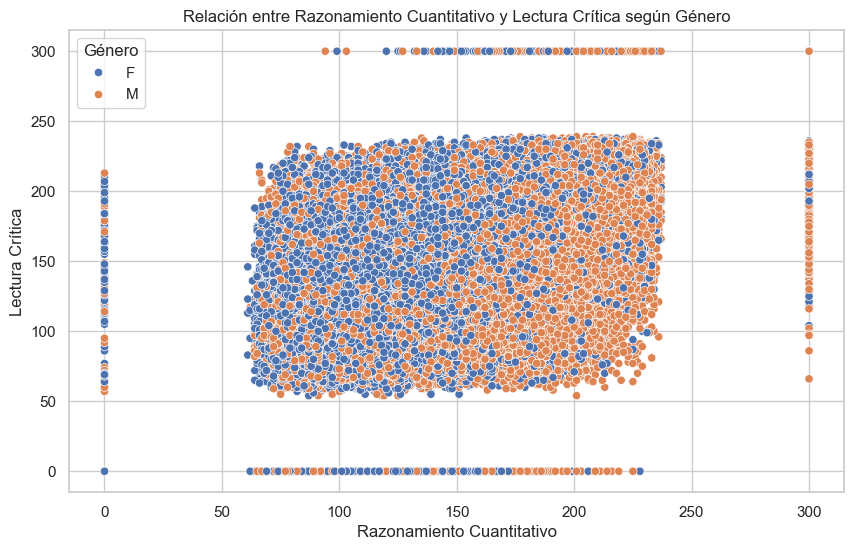

In [20]:
# Gráfico de dispersión entre MOD_RAZONA_CUANTITAT_PUNT y MOD_LECTURA_CRITICA_PUNT
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MOD_RAZONA_CUANTITAT_PUNT', y='MOD_LECTURA_CRITICA_PUNT', hue='ESTU_GENERO')
plt.title('Relación entre Razonamiento Cuantitativo y Lectura Crítica según Género')
plt.xlabel('Razonamiento Cuantitativo')
plt.ylabel('Lectura Crítica')
plt.legend(title='Género')
plt.show()


Las figuras muestran que, en las pruebas de lectura crítica y razonamiento cuantitativo, los hombres obtienen puntuaciones superiores en comparación con las mujeres. En la prueba de lectura crítica, los hombres se destacan con puntuaciones perfectas de 300, mientras que las mujeres tienden a obtener los puntajes más bajos. En cuanto al razonamiento cuantitativo, los hombres también sobresalen en los mejores resultados. En la distribución de frecuencias, el color naranja, que representa al sexo masculino, indica una mayor frecuencia de puntajes superiores a 170. Sin embargo, en la línea correspondiente al puntaje perfecto de 300, se observa una mayor cantidad de valores atípicos entre las mujeres, es decir, puntuaciones perfectas, aunque estas son menos frecuentes que los puntajes altos obtenidos por los hombres.





1. Variables Cuantitativas- Resultados pruebas (7):
MOD_RAZONA_CUANTITAT_PUNT, MOD_COMUNI_ESCRITA_PUNT, MOD_COMUNI_ESCRITA_DESEM, MOD_INGLES_DESEM, MOD_LECTURA_CRITICA_PUNT, MOD_INGLES_PUNT, MOD_COMPETEN_CIUDADA_PUNT

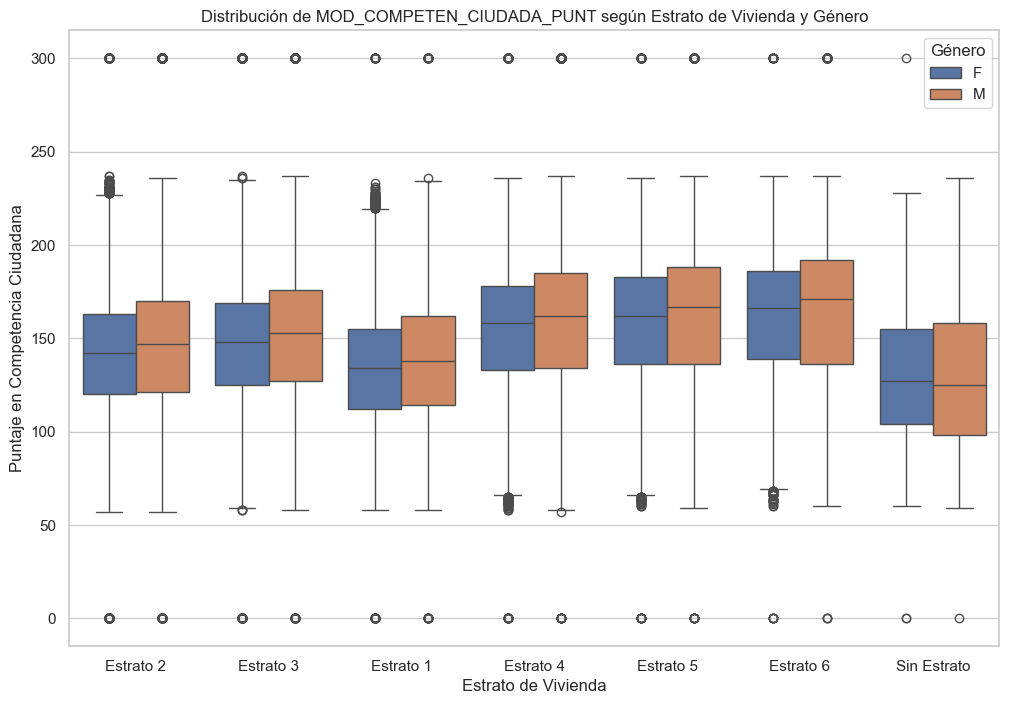

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='FAMI_ESTRATOVIVIENDA', y='MOD_COMPETEN_CIUDADA_PUNT', hue='ESTU_GENERO')
plt.title('Distribución de MOD_COMPETEN_CIUDADA_PUNT según Estrato de Vivienda y Género')
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Puntaje en Competencia Ciudadana')
plt.legend(title='Género')
plt.show()

Se encontró que, al analizar los puntajes en competencias ciudadanas por estratos, el estrato 6 muestra los mejores resultados, destacándose por una mediana más alta y con un rendimiento superior del sexo masculino en comparación con el sexo femenino. A continuación, se observan mejores resultados en el estrato 5, seguido por el estrato 4 y el estrato 3. Por otro lado, los estudiantes del estrato 1 presentan puntajes significativamente inferiores en comparación con los de los demás estratos. En todos los casos existen casos atipicos, que representa que el maximo resultado.



